## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
df.info() #데이터 종류 확인

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df = df.dropna() #결측치 행 제거
df.shape

(7032, 20)

In [7]:
num_col = df._get_numeric_data().columns.tolist() #수치형 컬럼만 갖고오기

In [8]:
df_ori = df.copy() #원본 복사

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

Text(0.5, 1.0, 'MonthlyCharges')

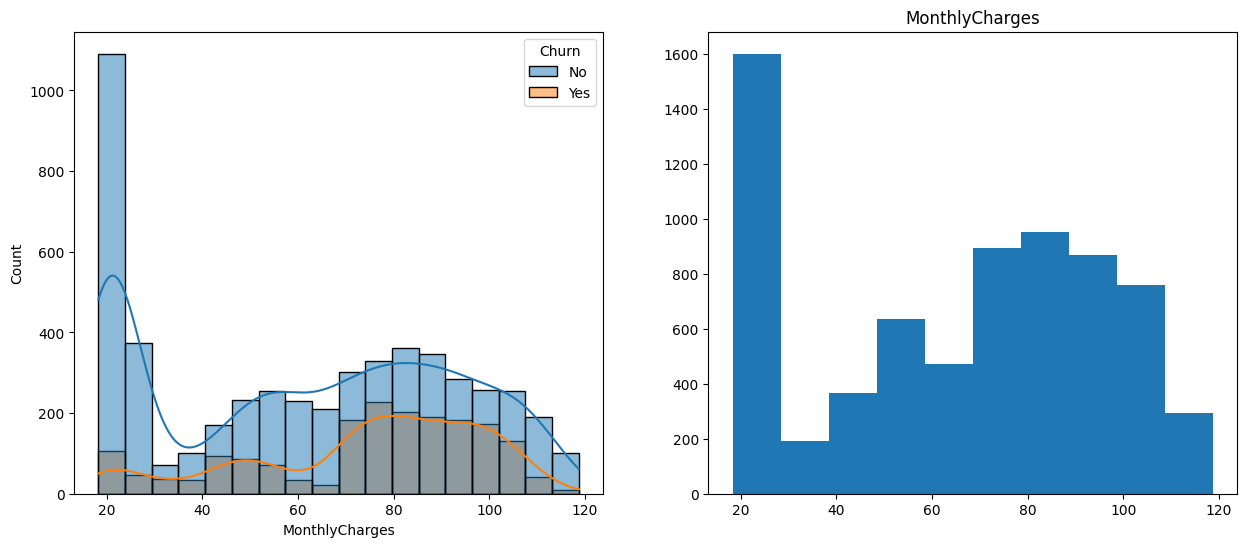

In [9]:
#범주화 전, 분포 확인
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(data=df, hue='Churn', x='MonthlyCharges', kde=True)
plt.subplot(1,2,2)
plt.hist(df['MonthlyCharges'])
plt.title("MonthlyCharges")

In [10]:
# 여기에 코드를 입력해 주세요.
def charge_s(n):
  if n < 30:
    return "0-30"
  elif n < 70:
    return "30-70"
  else:
    return "70-plus"


df["month_charge"] = df['MonthlyCharges'].apply(charge_s)

df.head()

# 범주화 전 히스토그램을 보면 이탈자에 비해 비이탈자가 크게 많은 구간(비율적 차이)이 30 / 70 / 70 이상으로 구분되는 것 같아서 해당 급간 설정
# 70 이상 부분에서는 yes가 차지하는 비율 상승
# 그래프 중 급격히 오르는 구간을 기준으로 나누는 것이 데이터를 잘 표현할 수 있다고 생각했음

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,month_charge
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-30
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,30-70
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30-70
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30-70
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,70-plus


Text(0.5, 1.0, 'MonthlyCharges')

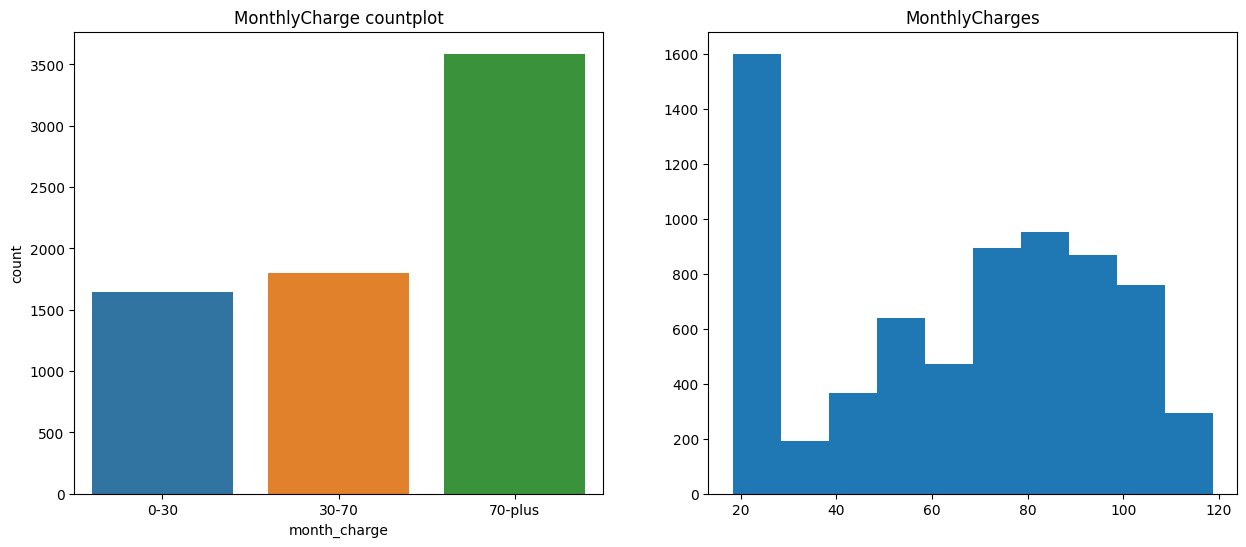

In [11]:
# 여기에 구간화 전의 수치 변수에 대한 히스토그램과 구간화 이후 범주로 변환해준 변수에 대한 countplot을 시각화 해주세요.

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='month_charge', hue='month_charge')
plt.title("MonthlyCharge countplot")
plt.subplot(1,2,2)
plt.hist(df['MonthlyCharges'])
plt.title("MonthlyCharges")

Text(0.5, 1.0, 'MonthlyCharge-Churn countplot')

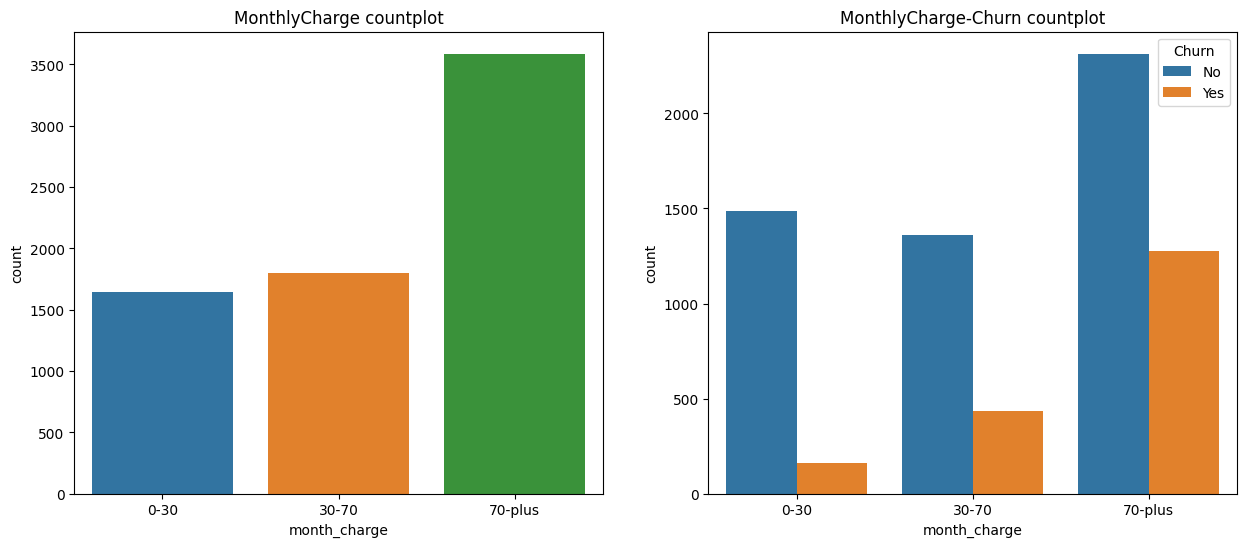

In [12]:
# y 값에 따라서 count 체크해보기

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='month_charge', hue='month_charge')
plt.title("MonthlyCharge countplot")
plt.subplot(1,2,2)
sns.countplot(data=df, x='month_charge', hue='Churn')
plt.title("MonthlyCharge-Churn countplot")

## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


In [13]:
# 여기에 one-hot-encoding 을 구현해 주세요.

basedf = pd.get_dummies(df,columns=['Partner','Dependents','PhoneService','PaperlessBilling', 'Churn'], drop_first=True)
basedf = pd.get_dummies(basedf)

print("컬럼 : \n", basedf.columns)
basedf.head()

컬럼 : 
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes', 'gender_Female', 'gender_Male',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paymen

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,gender_Female,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,month_charge_0-30,month_charge_30-70,month_charge_70-plus
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3668-QPYBK,0,2,53.85,108.15,0,0,1,1,1,0,...,1,0,0,0,0,0,1,0,1,0
7795-CFOCW,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9237-HQITU,0,2,70.70,151.65,0,0,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1


## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


In [14]:
basedf.info() #최종 df 확인

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Partner_Yes                              7032 non-null   uint8  
 5   Dependents_Yes                           7032 non-null   uint8  
 6   PhoneService_Yes                         7032 non-null   uint8  
 7   PaperlessBilling_Yes                     7032 non-null   uint8  
 8   Churn_Yes                                7032 non-null   uint8  
 9   gender_Female                            7032 non-null   uint8  
 10  gender_Male                           

In [15]:
#월 요금 범주화 했으므로 월 요금 컬럼 삭제
basedf = basedf.drop('MonthlyCharges', axis=1)

X = basedf.drop('Churn_Yes', axis=1)
y = basedf["Churn_Yes"]
X

,SeniorCitizen,tenure,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,month_charge_0-30,month_charge_30-70,month_charge_70-plus
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,34,1889.50,0,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3668-QPYBK,0,2,108.15,0,0,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
7795-CFOCW,0,45,1840.75,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
9237-HQITU,0,2,151.65,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1990.50,1,1,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2234-XADUH,0,72,7362.90,1,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4801-JZAZL,0,11,346.45,1,1,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# 여기에 모델을 구현해 주세요.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [18]:
# 위에서 만든 모델로 학습과 예측을 진행해 주세요.

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# 학습 결과와 원래 정답과의 Accuracy(정확도)를 구해주세요.
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict) #정확도 출력

0.7320540156361052

In [20]:
# train 정확도, test 정확도 비교
y_predict = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("test 정확도 : " , accuracy_score(y_test, y_predict))
print("train 정확도 : " , accuracy_score(y_train, y_train_pred))

print("차이: " , accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_predict))

# overfitting

test 정확도 :  0.7320540156361052
train 정확도 :  0.9987555555555555
차이:  0.26670153991945034


### 다양한 경우에 따른 정확도 비교

0. base   
  - 월 요금 범주화 (수치형 월 요금은 drop)
  - 이후 모델들은 base 에 추가 옵션이 붙은 형식

1. case1
  - 계약 기간을 범주화
  - TotalCharges drop

2. case2
  - 인터넷 관련 가입 서비스 수 (파생 컬럼)
  - 보안, 기술 관련 인터넷 서비스 가입 수 (파생 컬럼)
  - 계약 횟수 (파생 컬럼)
  - TotalCharges drop
3. case3
  - TotalCharges 로그 스케일링  
  - case3-1
    - 이상치 제거
4. case4
  - 계약 기간을 범주화
  - 인터넷 관련 가입 서비스 수 (파생 컬럼)
  - 보안, 기술 관련 인터넷 서비스 가입 수 (파생 컬럼)
  - 계약 횟수 (파생 컬럼)
  - 이상치 제거
  - TotalCharges drop


----------------------------------

### 결과

- baseline


> test 정확도 :  0.7320540156361052   
train 정확도 :  0.9987555555555555  
차이:  0.26670153991945034  
x_col : 43개

- case1

> test 정확도 :  0.7164179104477612  
train 정확도 :  0.9456  
차이:  0.22918208955223884   
x_col : 44개

- case2

> test 정확도 :  0.7228144989339019  
train 정확도 :  0.9768888888888889  
차이:  0.254074389954987   
x_col : 27개

- case3

> test 정확도 :  0.7306325515280739  
train 정확도 :  0.9987555555555555  
차이:  0.26812300402748157  
x_col : 43개

- case3-1

> test 정확도 :  0.7364620938628159  
train 정확도 :  0.9983748645720477  
차이:  0.2619127707092318  
x_col : 43개


- case4

> test 정확도 :  0.7444043321299639  
train 정확도 :  0.9768869628024558  
차이:  0.23248263067249186  
x_col : 29개

#### 결과 해석
- baseline 의 경우 overfitting 이 발생한 것 같다.
- 로그 스케일링의 경우 DT에서는 큰 영향력을 발생시키지 않는다
- case2에서 예측 값은 base 보다 낮긴 했지만, 과적합 면에서 base 보다 개선된 결과를 보이는 것 같다 -> 주어진 df는 원핫인코딩 시 너무 많은 컬럼을 생성하게 된다. >> 컬럼을 요약할 수 있도록 하는 것이 필요
- 이상치 제거는 소폭 성능 상승에 영향을 주는 것 같다.
- 컬럼(데이터)이 많다고 > 성능 상승에 기여하지 않음
- case 4 의 경우 모든 경우의 수에서 base 보다 개선됨 > 하지만 여전히 overfitting 으로 판단된다.

In [21]:
# 학습/ 정확도 출력 함수

def acc_model(df, y_col='Churn_Yes'):
  X = df.drop(y_col, axis=1)
  y = df[y_col]

  #데이터 분할
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

  # 학습
  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  #정확도 계산
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  print("test 정확도 : " , accuracy_score(y_test, y_test_pred))
  print("train 정확도 : " , accuracy_score(y_train, y_train_pred))

  return accuracy_score(y_test, y_test_pred), accuracy_score(y_train, y_train_pred)



In [22]:
# one-hot encoding 진행 함수

def change_df(df, one_col=['Partner','Dependents','PhoneService','PaperlessBilling', 'Churn']):
  newdf = pd.get_dummies(df,columns=one_col, drop_first=True)
  newdf = pd.get_dummies(newdf)

  return newdf

Text(0.5, 1.0, 'tenure')

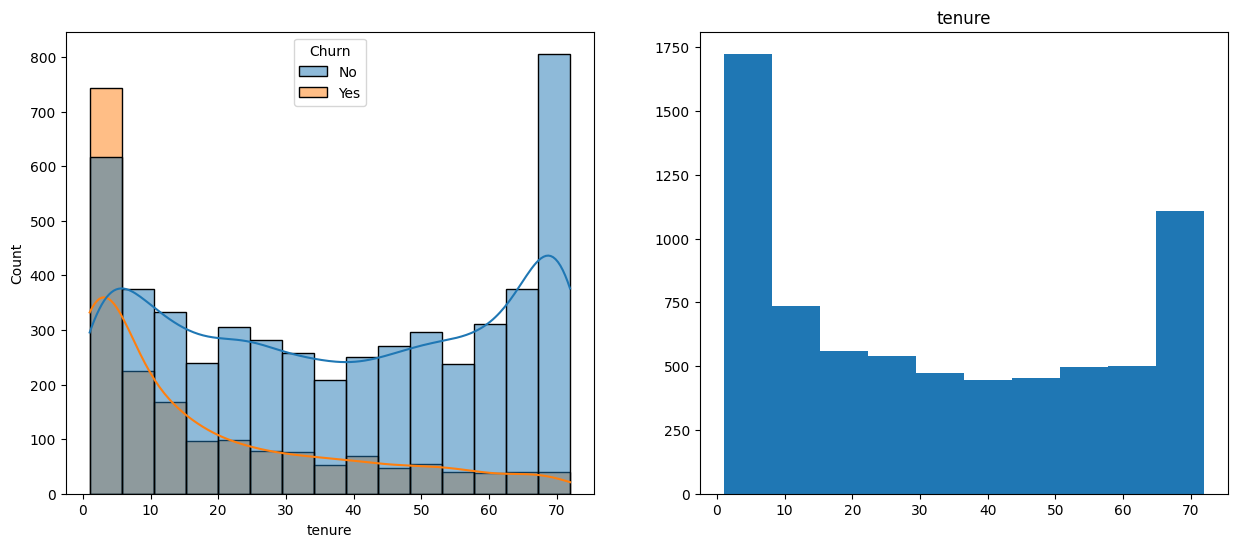

In [23]:
# E1 : basemodel(월 요금 범주화)에서 -> 계약 기간을 범주화, TotalCharges 를 drop한 데이터

#계약 기간 시각화

ex1 = df.copy() #복사

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(data=ex1, hue='Churn', x='tenure', kde=True)
plt.subplot(1,2,2)
plt.hist(df['tenure'])
plt.title("tenure")


In [24]:
def tenure_s(n):
  if n < 15:
    return "0-15"
  elif n < 40:
    return "15-40"
  else:
    return "40-plus"


ex1["tenure_s"] = ex1['tenure'].apply(tenure_s)

ex1.head()

# 10, 70 등 끝단 빈도가 높고 가운데가 감소하는 U자 분포
# 이탈자는 계약 유지 기간이 점점 감소

# 이탈자가 급하게 감소하는 시점, 전체가 다시 증가하는 시점 기준으로 3분할

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,month_charge,tenure_s
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-30,0-15
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,30-70,15-40
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30-70,0-15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30-70,40-plus
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,70-plus,0-15


Text(0.5, 1.0, 'tenure_s-Churn countplot')

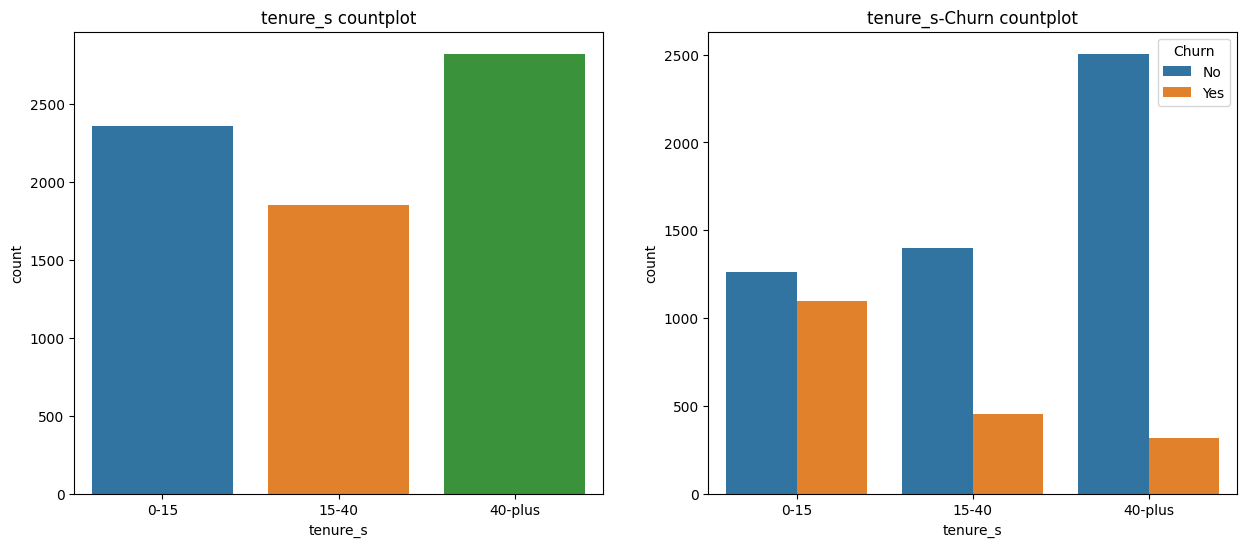

In [25]:
# 범주화 하고 결과 시각화
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.countplot(data=ex1, x='tenure_s', hue='tenure_s')
plt.title("tenure_s countplot")
plt.subplot(1,2,2)
sns.countplot(data=ex1, x='tenure_s', hue='Churn')
plt.title("tenure_s-Churn countplot")

In [26]:
ex1 = ex1.drop(['TotalCharges', 'tenure', 'MonthlyCharges'], axis=1) #TotalCharges, tenure, MonthlyCharges drop
ex1 = change_df(ex1)

ex1.columns

Index(['SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes', 'gender_Female', 'gender_Male',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_

In [27]:
# 학습 후 정확도 출력
ex1_test_acc, ex1_train_acc = acc_model(ex1)
print("차이: " , ex1_train_acc - ex1_test_acc )

test 정확도 :  0.7164179104477612
train 정확도 :  0.9456
차이:  0.22918208955223884


In [28]:
ex1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   Partner_Yes                              7032 non-null   uint8
 2   Dependents_Yes                           7032 non-null   uint8
 3   PhoneService_Yes                         7032 non-null   uint8
 4   PaperlessBilling_Yes                     7032 non-null   uint8
 5   Churn_Yes                                7032 non-null   uint8
 6   gender_Female                            7032 non-null   uint8
 7   gender_Male                              7032 non-null   uint8
 8   MultipleLines_No                         7032 non-null   uint8
 9   MultipleLines_No phone service           7032 non-null   uint8
 10  MultipleLines_Yes                        7032 non-null   uint8

In [29]:
# E2 인터넷 서비스 가입 개수 / 보안,기술 서비스 가입 개수 / 재계약 횟수 컬럼 생성
# MonthlyCharges / TotalCharge drop
# 인터넷 서비스 컬럼 drop

ex2 = df.copy()
ex2 = ex2.drop("MonthlyCharges", axis=1) #범주화 컬럼이 있기 때문에 중복된 내용 제거

In [30]:
ex2 = pd.get_dummies(ex2,columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
#인터넷 서비스 가입 개수
ex2['InternetSum'] = ex2['OnlineSecurity_Yes'] + ex2['OnlineBackup_Yes'] + ex2['DeviceProtection_Yes'] + ex2['TechSupport_Yes'] + ex2['StreamingTV_Yes'] + ex2['StreamingMovies_Yes']
#보안, 기술 서비스 가입 개수
ex2['InternetPSum'] = ex2['OnlineSecurity_Yes'] + ex2['OnlineBackup_Yes'] + ex2['DeviceProtection_Yes'] + ex2['TechSupport_Yes']
ex2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,InternetSum,InternetPSum
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,...,0,0,1,0,0,1,0,0,1,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,One year,No,...,0,0,1,0,0,1,0,0,2,2
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,...,0,0,1,0,0,1,0,0,2,2
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,One year,No,...,0,1,1,0,0,1,0,0,3,3
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,...,0,0,1,0,0,1,0,0,0,0


In [31]:
def to_num_con(s):
  if s == 'Month-to-month':
    return 1
  elif s == 'One year':
    return 12
  elif s == 'Two year':
    return 24

#계약에 따라 해당 개월 수를 수치화
ex2['Contract_num'] = ex2['Contract'].apply(to_num_con)
ex2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7032 non-null   object 
 1   SeniorCitizen                         7032 non-null   int64  
 2   Partner                               7032 non-null   object 
 3   Dependents                            7032 non-null   object 
 4   tenure                                7032 non-null   int64  
 5   PhoneService                          7032 non-null   object 
 6   MultipleLines                         7032 non-null   object 
 7   InternetService                       7032 non-null   object 
 8   Contract                              7032 non-null   object 
 9   PaperlessBilling                      7032 non-null   object 
 10  PaymentMethod                         7032 non-null   object 
 11  TotalCh

In [32]:
# 재계약 횟수
ex2['Con_number'] = ex2['tenure'] // ex2['Contract_num']

# 필요 없는 행 drop

ex2 = ex2[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'month_charge','InternetSum', 'InternetPSum', 'Con_number', 'Churn']]

ex2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,month_charge,InternetSum,InternetPSum,Con_number,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,0-30,1,1,1,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,One year,No,Mailed check,30-70,2,2,2,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,30-70,2,2,2,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),30-70,3,3,3,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70-plus,0,0,2,Yes


In [33]:
ex2 = change_df(ex2)
ex2_test_acc, ex2_train_acc = acc_model(ex2)
print("차이: " , ex2_train_acc - ex2_test_acc)

test 정확도 :  0.7228144989339019
train 정확도 :  0.9768888888888889
차이:  0.254074389954987


In [34]:
ex2.info() #ex1 에 비해 컬럼 수 감소

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   tenure                                   7032 non-null   int64
 2   InternetSum                              7032 non-null   uint8
 3   InternetPSum                             7032 non-null   uint8
 4   Con_number                               7032 non-null   int64
 5   Partner_Yes                              7032 non-null   uint8
 6   Dependents_Yes                           7032 non-null   uint8
 7   PhoneService_Yes                         7032 non-null   uint8
 8   PaperlessBilling_Yes                     7032 non-null   uint8
 9   Churn_Yes                                7032 non-null   uint8
 10  gender_Female                            7032 non-null   uint8

<ipython-input-35-5a12702acce1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(ex3["TotalCharges"]))
<ipython-input-35-5a12702acce1>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ex3["TotalCharges"])


Text(0.5, 1.0, 'TotalCharges')

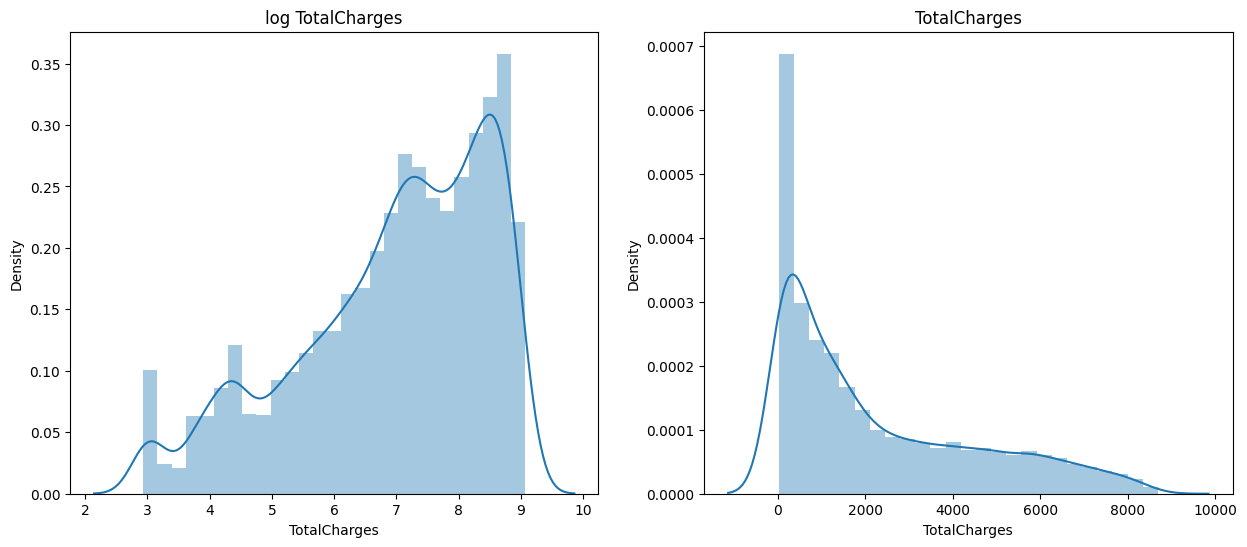

In [35]:
# E3 -> 월 요금을 제거 / total Charges 를 정규분포 형태로 바꾸기
# 로그 스케일링


ex3 = df.copy()
ex3 = ex3.drop("MonthlyCharges", axis=1) #범주화 컬럼이 있기 때문에 중복된 내용 제거

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(np.log(ex3["TotalCharges"]))
plt.title("log TotalCharges")
plt.subplot(1,2,2)
sns.distplot(ex3["TotalCharges"])
plt.title("TotalCharges")

In [36]:
ex3["TotalCharges"] = np.log(ex3["TotalCharges"]) #로그 스케일링

In [37]:
ex3 = change_df(ex3)
ex3_test_acc, ex3_train_acc = acc_model(ex3)
print("차이: " , ex3_train_acc - ex3_test_acc) #base 와 비교해서 큰 차이 없음 #test 정확도 매우 소폭 감소

test 정확도 :  0.7306325515280739
train 정확도 :  0.9987555555555555
차이:  0.26812300402748157


In [38]:
ex3.info() #컬럼 확인

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   TotalCharges                             7032 non-null   float64
 3   Partner_Yes                              7032 non-null   uint8  
 4   Dependents_Yes                           7032 non-null   uint8  
 5   PhoneService_Yes                         7032 non-null   uint8  
 6   PaperlessBilling_Yes                     7032 non-null   uint8  
 7   Churn_Yes                                7032 non-null   uint8  
 8   gender_Female                            7032 non-null   uint8  
 9   gender_Male                              7032 non-null   uint8  
 10  MultipleLines_No                      

Text(0.5, 1.0, 'tenure')

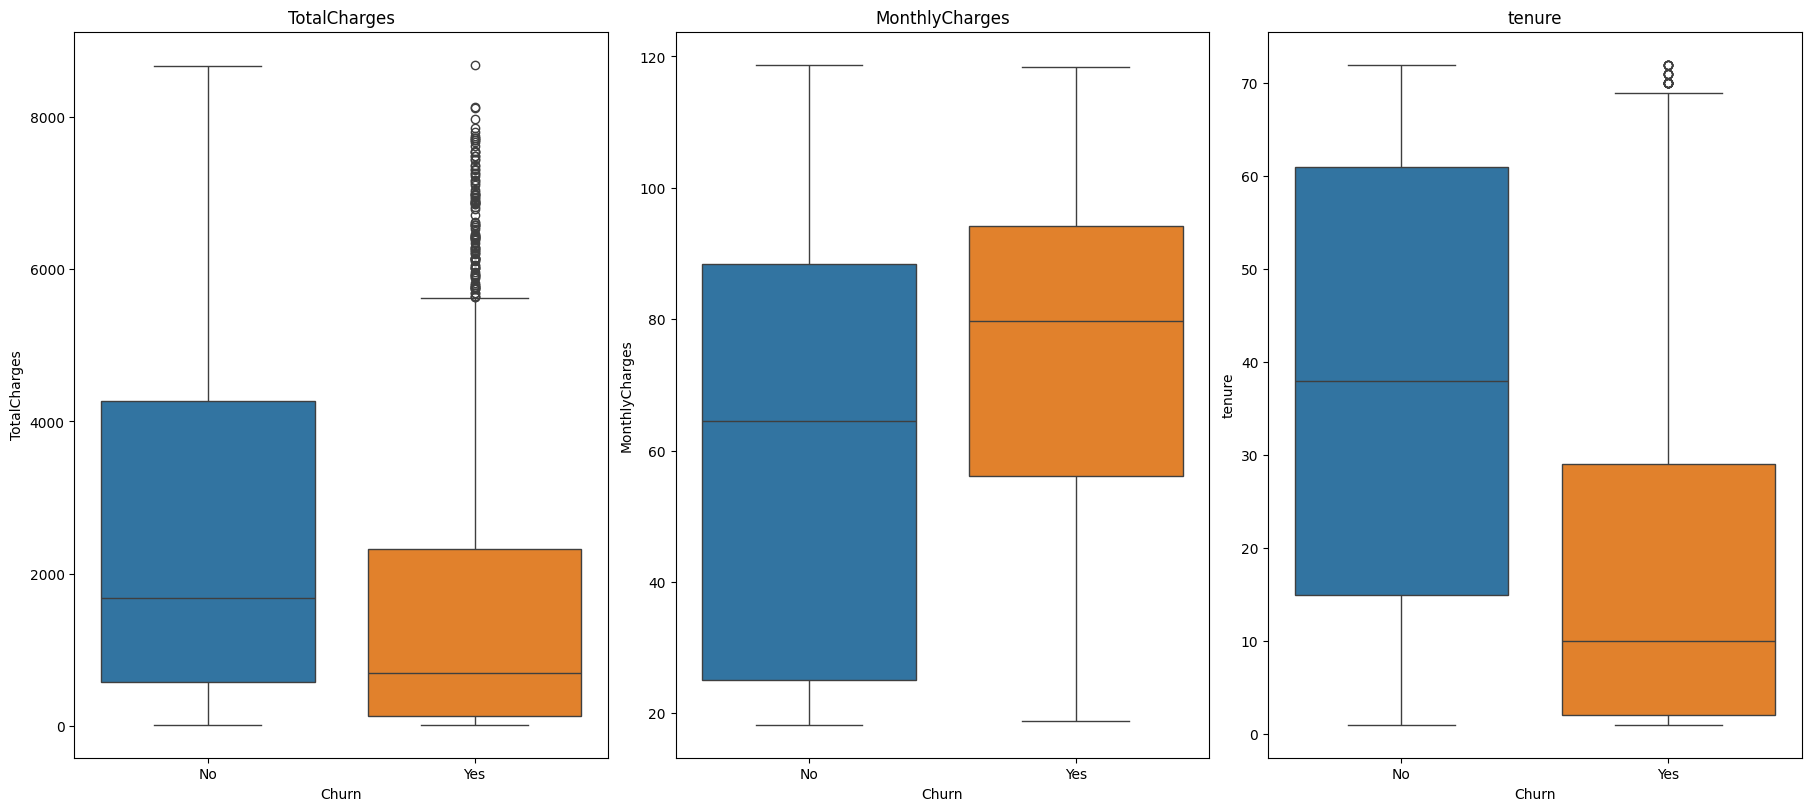

In [39]:
# E3+ : 이상치 제거

# ex3에서 이상치를 제거해보기

# 이상치 박스 플롯

plt.figure(figsize=(18,8), constrained_layout = True)

plt.subplot(1,3,1)
sns.boxplot(data=df, y='TotalCharges', x='Churn', hue='Churn')
plt.title("TotalCharges")

plt.subplot(1,3,2)
sns.boxplot(data=df, y='MonthlyCharges', x='Churn', hue='Churn')
plt.title("MonthlyCharges")

plt.subplot(1,3,3)
sns.boxplot(data=df, y='tenure', x='Churn', hue='Churn')
plt.title("tenure")

In [40]:
# 이상치 제거 (Churn == yes 데이터만 제거 )
d = df[df['Churn'] == 'Yes']
IQR3 = d["TotalCharges"].quantile(0.75)
IQR1 = d["TotalCharges"].quantile(0.25)
IQR = IQR3 - IQR1
OUT = IQR3 + (IQR * 1.5)
OUT # 이 이후 값을 가진 데이터는 삭제

5626.5

In [41]:
ex3_out = ex3[(df['TotalCharges'] < OUT) & (ex3['Churn_Yes'] == 1) | (ex3['Churn_Yes'] == 0)] #이탈자 데이터 중, 이상치 범위에 속하는 데이터 제거
ex3_out.shape

(6923, 44)

In [42]:
ex3_out_test_acc, ex3_out_train_acc = acc_model(ex3_out)
print("차이: " , ex3_out_train_acc - ex3_out_test_acc)

# 이상치 제거시 약간의 과적합과, 예측 개선 --> 하지만 큰 의미 없이 유사
# 과적합

test 정확도 :  0.7364620938628159
train 정확도 :  0.9983748645720477
차이:  0.2619127707092318


In [43]:
# E4 : baseline(월요금 범주화) -> 계약 기간 범주화 / 계약 횟수 / 인터넷 서비스 / 행(이상치) drop
# Total drop

ex4 = df.copy()

ex4 = ex4[(df['TotalCharges'] < OUT) & (df['Churn'] == 'Yes') | (df['Churn'] == 'No')]  #이상치 제거

ex4["tenure_s"] = ex4['tenure'].apply(tenure_s) #계약 기간 범주화

#파생변수 생성
ex4 = pd.get_dummies(ex4,columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
#인터넷 서비스 가입 개수
ex4['InternetSum'] = ex4['OnlineSecurity_Yes'] + ex4['OnlineBackup_Yes'] + ex4['DeviceProtection_Yes'] + ex4['TechSupport_Yes'] + ex4['StreamingTV_Yes'] + ex4['StreamingMovies_Yes']
#보안,기술 관련 서비스 가입 개수
ex4['InternetPSum'] = ex4['OnlineSecurity_Yes'] + ex4['OnlineBackup_Yes'] + ex4['DeviceProtection_Yes'] + ex4['TechSupport_Yes']

#계산을 위한 계약기간 수치화
ex4['Contract_num'] = ex4['Contract'].apply(to_num_con)
#계약 횟수 계산
ex4['Con_number'] = ex4['tenure'] // ex4['Contract_num']



In [44]:
#원하는 데이터만 추출

ex4 = ex4[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract','PaperlessBilling', 'PaymentMethod',
 'Churn', 'month_charge', 'tenure_s','InternetSum', 'InternetPSum', 'Con_number']]

In [45]:
ex4.to_csv("ex4.csv")

In [46]:
ex4 = change_df(ex4)
ex4_test_acc, ex4_train_acc = acc_model(ex4)
print("차이: " , ex4_train_acc - ex4_test_acc)

# 가장 좋은 경우
# base 에서 비교적 과적합 및 예측 정확도 개선

test 정확도 :  0.7444043321299639
train 정확도 :  0.9768869628024558
차이:  0.23248263067249186


In [47]:
ex4.info() #컬럼 수 확인

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            6923 non-null   int64
 1   InternetSum                              6923 non-null   uint8
 2   InternetPSum                             6923 non-null   uint8
 3   Con_number                               6923 non-null   int64
 4   Partner_Yes                              6923 non-null   uint8
 5   Dependents_Yes                           6923 non-null   uint8
 6   PhoneService_Yes                         6923 non-null   uint8
 7   PaperlessBilling_Yes                     6923 non-null   uint8
 8   Churn_Yes                                6923 non-null   uint8
 9   gender_Female                            6923 non-null   uint8
 10  gender_Male                              6923 non-null   uint8